# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **Erasmus Scholarship Grant Prediction Engine** |

# II. Notebook Target Definition

_Insert Text Here_

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
X = pd.read_pickle('../../data/processed/X.pkl')
y = pd.read_pickle('../../data/processed/y.pkl')

In [3]:
X.head()

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32


In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: GRANT, dtype: int64

# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [5]:
X.shape, y.shape

((341, 6), (341,))

## IV.B. Data Information Inspection

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 16.1+ KB


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 341 entries, 0 to 340
Series name: GRANT
Non-Null Count  Dtype
--------------  -----
341 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


## IV.C. Missing Values Inspection

In [8]:
X_missing = pd.DataFrame(
    X.isnull().sum().sort_values() / len(X) * 100).reset_index()
X_missing.columns = ["variables", "missing_percentage"]
X_missing

,variables,missing_percentage
0,INDEX,0.00000
1,COUNTRIES,0.00000
2,UNIVERSITIES,0.00000
3,FACULTIES,0.00000
4,EXAM SCORE,0.00000
5,DEPARTMENTS,0.58651


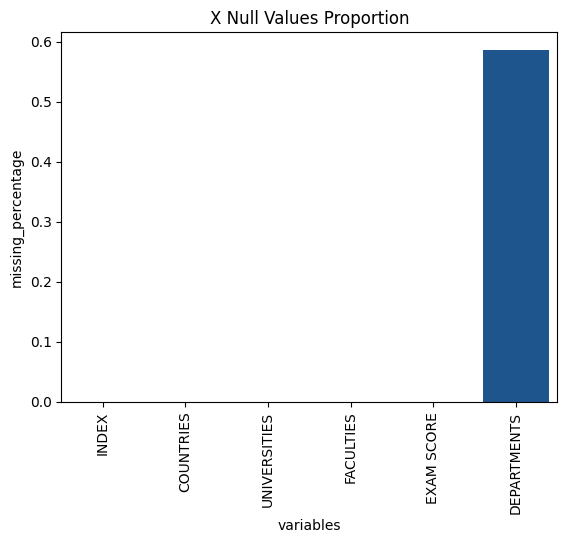

In [9]:
sns.barplot(data=X_missing,
            x="variables",
            y="missing_percentage",
            hue="variables",
            palette='Blues',
            legend=False)
plt.title("X Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

### IV.C.1. Missing Values Imputation for Categorical Columns

In [10]:
X[X["DEPARTMENTS"].isnull()]

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE
216,217,DUTCH,STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM,FACULTY OF COMPUTER AND INFORMATION SCIENCES,NaN,76.92
245,246,FRANCE,CY CERGY PARIS UNIVERSITE,FACULTY OF COMPUTER AND INFORMATION SCIENCES,NaN,74.27


In [11]:
X['DEPARTMENTS'].mode()[0]

'COMPUTER ENGINEERING'

In [12]:
mode_value = X["DEPARTMENTS"].mode()[0]
X["DEPARTMENTS"] = X["DEPARTMENTS"].fillna(mode_value)

In [13]:
X.isnull().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     0
EXAM SCORE      0
dtype: int64

## IV.D. Duplicated Values Inspection

In [14]:
X_duplicated = X[X.duplicated(keep=False)]
X_duplicated.shape

(0, 6)

In [15]:
X_duplicated

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE


## IV.E. Unused Column Removal

In [16]:
def unused_column_removal(df, cols_to_remove):
    df.drop(columns=cols_to_remove, inplace=True)
    return df

In [17]:
cols_to_remove = ["INDEX"]

In [18]:
unused_column_removal(X, cols_to_remove)
X.shape

(341, 5)

## IV.F. Data Visualization

### IV.F.1. Target Label Proportion

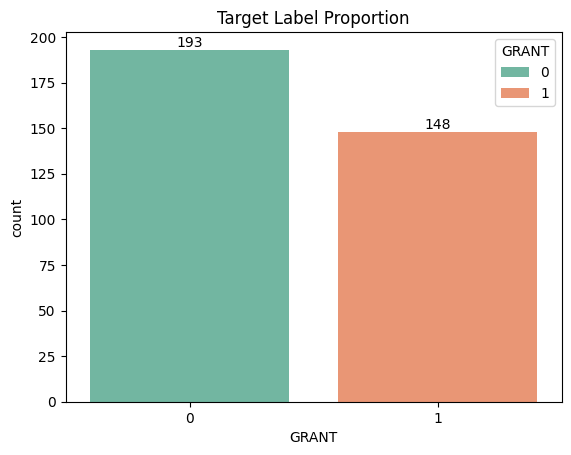

In [19]:
# Barplot
plt.title("Target Label Proportion")
y_proportion = sns.countplot(x=y, hue=y, palette='Set2')
for container in y_proportion.containers:
    y_proportion.bar_label(container)
plt.show()

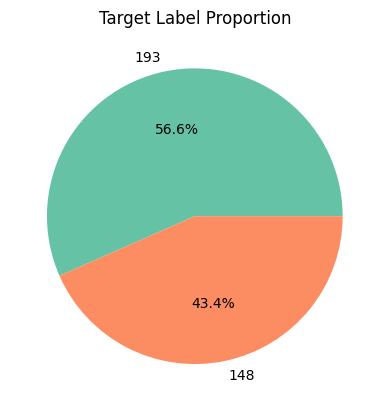

In [20]:
# Pie Chart
plt.title("Target Label Proportion")
plt.pie(x=y.value_counts(),
        labels=y.value_counts(),
        colors=sns.color_palette('Set2'),
        autopct='%1.1f%%')
plt.show()

### IV.F.2. Countries Distribution

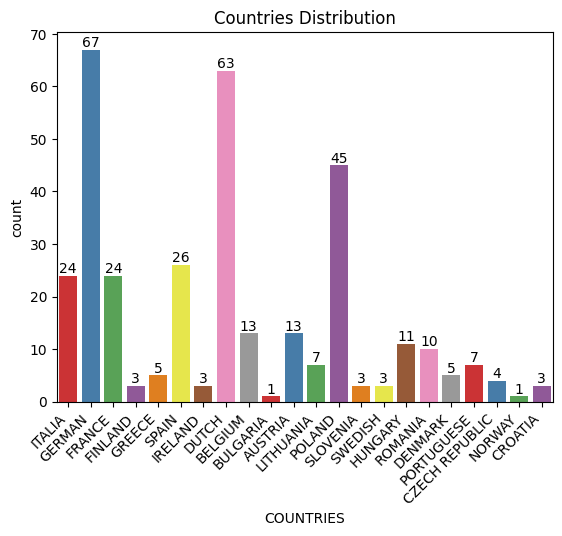

In [21]:
plt.title("Countries Distribution")
countries_distribution = sns.countplot(
    data=X, x="COUNTRIES", hue="COUNTRIES", palette='Set1', legend=False)
for container in countries_distribution.containers:
    countries_distribution.bar_label(container)
for item in countries_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.F.3. Universities Distribution

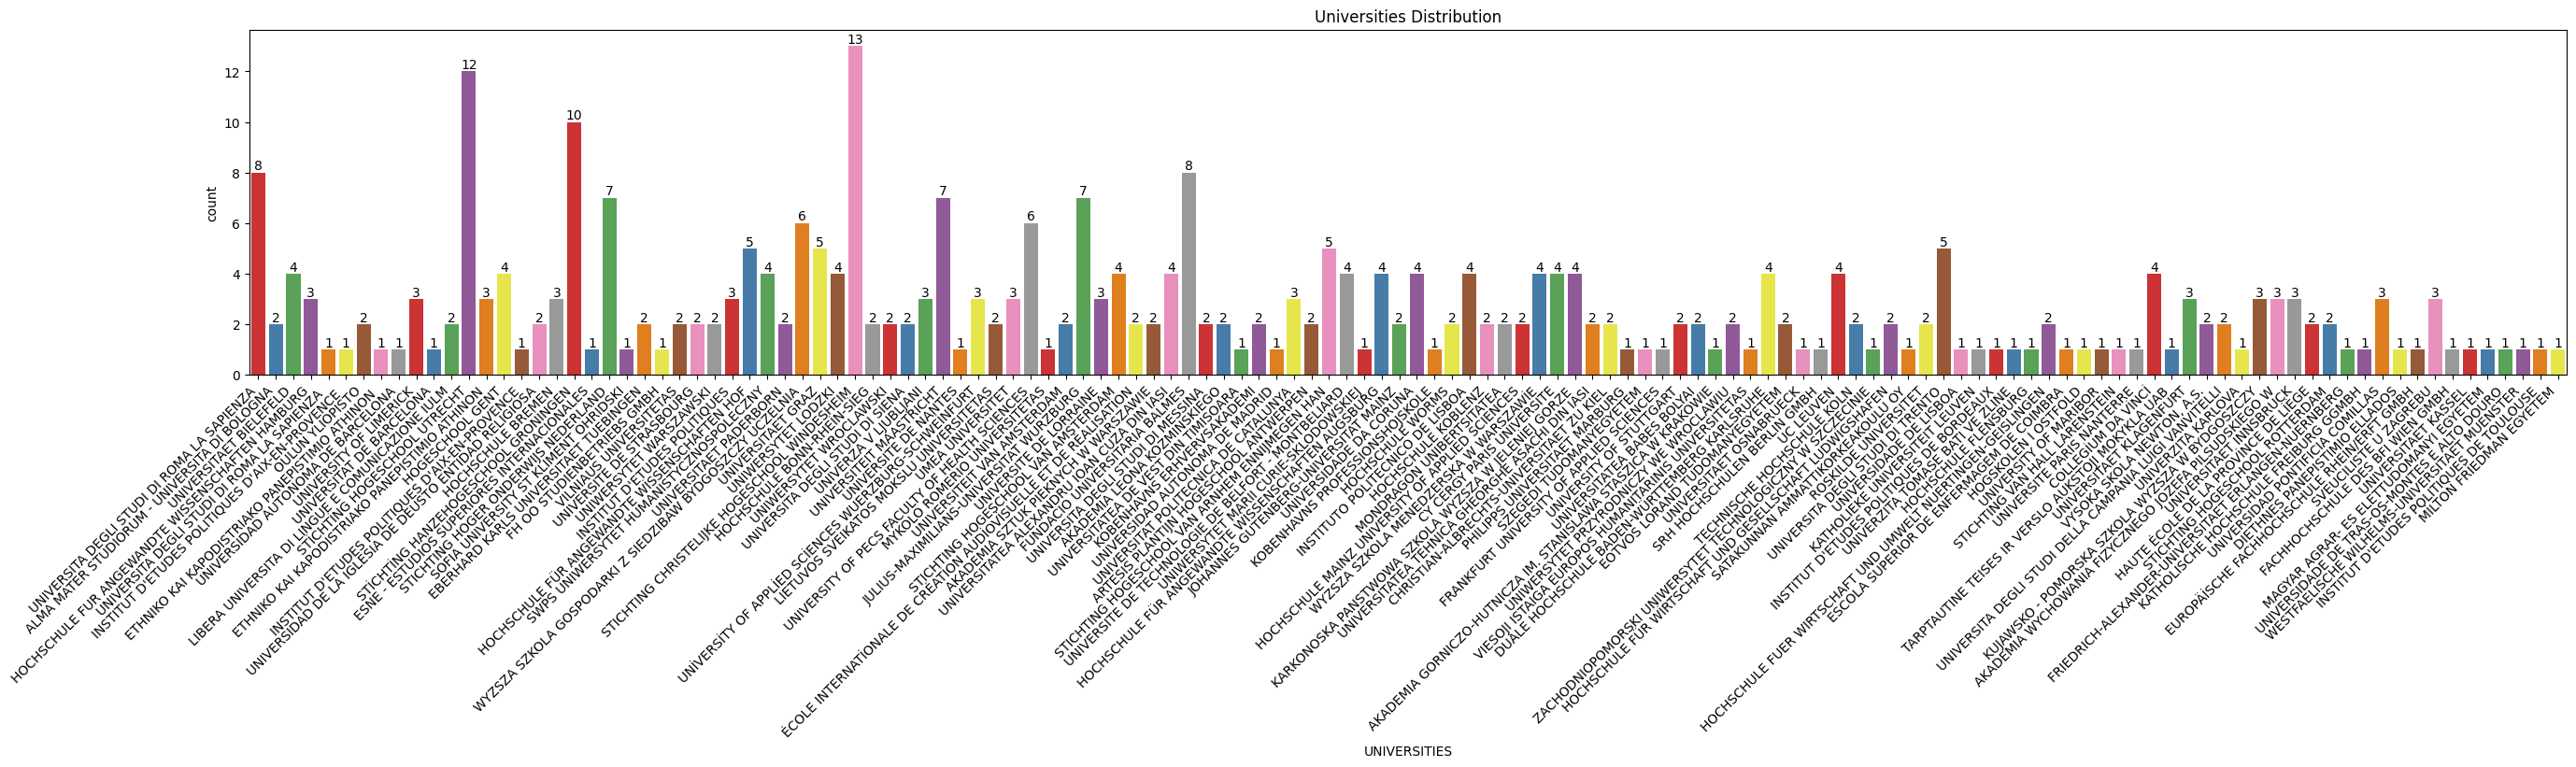

In [22]:
plt.figure(figsize=(32, 4.8))
plt.title("Universities Distribution")
universities_distribution = sns.countplot(
    data=X, x="UNIVERSITIES", hue="UNIVERSITIES", palette='Set1', legend=False)
for container in universities_distribution.containers:
    universities_distribution.bar_label(container)
for item in universities_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.F.4. Faculties Distribution

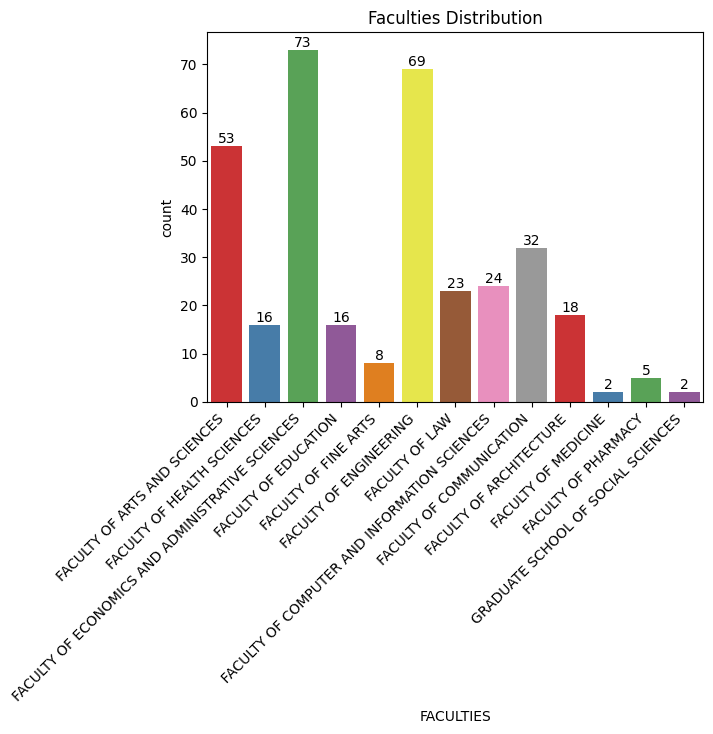

In [23]:
plt.title("Faculties Distribution")
faculties_distribution = sns.countplot(
    data=X, x="FACULTIES", hue="FACULTIES", palette='Set1', legend=False)
for container in faculties_distribution.containers:
    faculties_distribution.bar_label(container)
for item in faculties_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.F.5. Departments Distribution

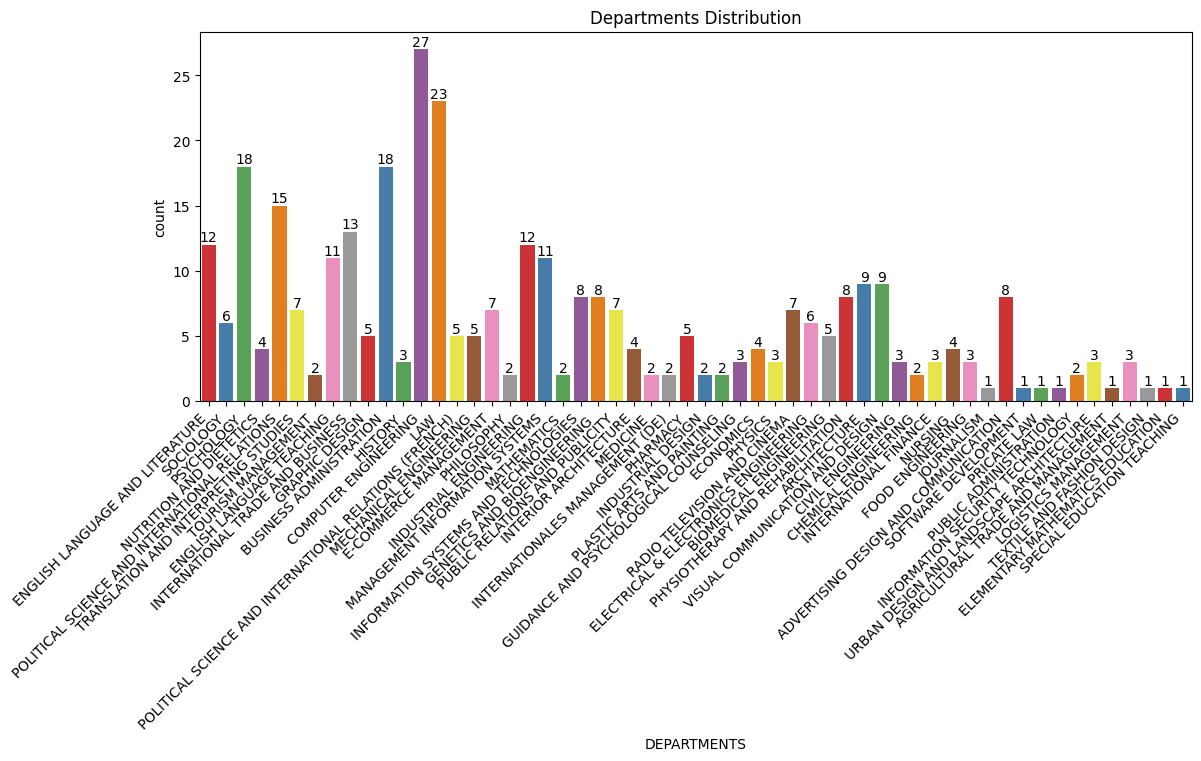

In [24]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Departments Distribution")
departments_distribution = sns.countplot(
    data=X, x="DEPARTMENTS", hue="DEPARTMENTS", palette='Set1', legend=False)
for container in departments_distribution.containers:
    departments_distribution.bar_label(container)
for item in departments_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.F.6. Exam Scores Distribution

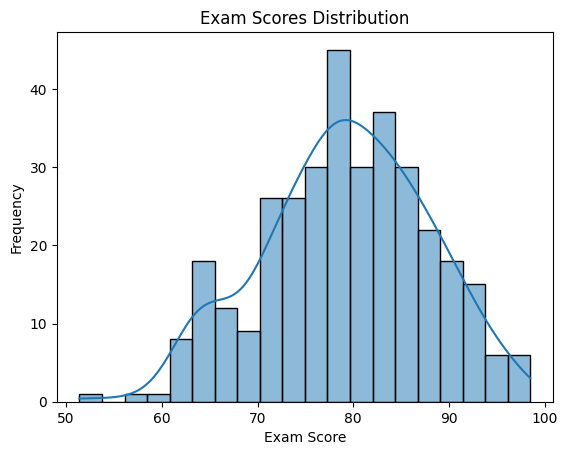

In [25]:
plt.title("Exam Scores Distribution")
sns.histplot(X["EXAM SCORE"], kde=True, bins=20)
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

## IV.G. Statistical Analysis

### IV.G.1. Statistical Description

In [26]:
X.describe()

,EXAM SCORE
count,341.000000
mean,79.138944
std,8.565175
min,51.400000
25%,73.570000
50%,79.300000
75%,85.280000
max,98.500000


### IV.G.2. Chi-Squared Analysis

Analyze the independence or dependence between categorical variables and assess the goodness of fit of observed data to an expected distribution.

In [27]:
X_categorical = X.select_dtypes(include='object').copy()
X_numerical = X.select_dtypes(include='number').copy()
X_categorical.shape, X_numerical.shape

((341, 4), (341, 1))

In [28]:
X_categorical.columns

Index(['COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS'], dtype='object')

In [29]:
X_numerical.columns

Index(['EXAM SCORE'], dtype='object')

In [30]:
chi2_list = []

for column in X_categorical.columns:
    cross_tab = pd.crosstab(y, X_categorical[column])
    chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(
        cross_tab)
    chi2_list.append({"variables": column, "p-value": round(p_value, 10)})

chi2_result = pd.DataFrame(chi2_list)
chi2_result = chi2_result.sort_values(by="p-value", ascending=True)
chi2_result.reset_index(drop=True, inplace=True)
chi2_result

,variables,p-value
0,UNIVERSITIES,0.007409
1,DEPARTMENTS,0.018266
2,FACULTIES,0.077619
3,COUNTRIES,0.282791


### IV.G.3. T-Statistics Analysis

Assess if there is a significant difference in means between two groups, such as comparing the mean scores of a continuous variable between two treatment groups.

In [31]:
t_test_results = pd.DataFrame()

for variable in X_numerical.columns:
    group_0_values = X_numerical.loc[y == 0, variable]
    group_1_values = X_numerical.loc[y == 1, variable]
    t_statistic, p_value = ttest_ind(group_0_values, group_1_values)
    result_df = pd.DataFrame(
        {"variables": [variable], "t-statistic": [t_statistic], "p-value": [p_value]})
    t_test_results = pd.concat([t_test_results, result_df], ignore_index=True)

t_test_table = t_test_results.sort_values(by="t-statistic", ascending=False)
t_test_table.reset_index(drop=True, inplace=True)
t_test_table

,variables,t-statistic,p-value
0,EXAM SCORE,-19.106276,9.507085e-56


### IV.G.4. ANOVA F Analysis

Compare more than two groups, such as comparing the mean scores of a continuous variable among different experimental conditions.

In [32]:
f_statistic, p_values = f_classif(X_numerical, y)

anova_f_table = pd.DataFrame({"variables": X_numerical.columns,
                             "f-score": f_statistic, "p-value": p_values.round(decimals=10)})
anova_f_table.sort_values(by="f-score", ascending=False,
                          inplace=True, ignore_index=True)
anova_f_table

,variables,f-score,p-value
0,EXAM SCORE,365.049794,0.0


# V. Preprocessing

## V.A. Data Splitting

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777, stratify=y)

In [34]:
X_train.shape, X_test.shape

((238, 5), (103, 5))

In [35]:
y_train.shape, y_test.shape

((238,), (103,))

In [36]:
y_train.value_counts()

GRANT
0    135
1    103
Name: count, dtype: int64

In [37]:
y_test.value_counts()

GRANT
0    58
1    45
Name: count, dtype: int64

## V.B. Export Data

In [38]:
X_train.to_pickle('../../data/processed/X_train.pkl')
X_test.to_pickle('../../data/processed/X_test.pkl')
y_train.to_pickle('../../data/processed/y_train.pkl')
y_test.to_pickle('../../data/processed/y_test.pkl')